## 変化点の検出

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import ruptures as rpt
import seaborn as sns
from full_fred.fred import Fred

# FRED_API_KEY = os.getenv('FRED_API_KEY')
fred = Fred()
print(f"FRED APIキーが環境変数に設定されている：{fred.env_api_key_found()}")


def get_fred_data(name, start="2013-01-01", end=""):
    df = fred.get_series_df(name)[["date", "value"]].copy()
    df["date"] = pd.to_datetime(df["date"])
    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    df = df.set_index("date")

    if end == "":
        df = df.loc[f"{start}":]
    else:
        df = df.loc[f"{start}":f"{end}"]

    return df

FRED APIキーが環境変数に設定されている：True


### FREDのデータを取得
[Retailers: Inventories to Sales Ratio](https://fred.stlouisfed.org/series/RETAILIRSA)のデータの変化点を検出してみます。このデータは棚卸資産と売上高の比率を示しており『1ヶ月の売上高に対して手元にある在庫が何ヶ月分あるか』の目安となる指標です。

In [36]:
df_DFF = get_fred_data("DFF", start="2013-01-01")
df_SP500 = get_fred_data("SP500", start="2013-01-01")
df_NASDAQ100 = get_fred_data("NASDAQ100", start="2013-01-01")

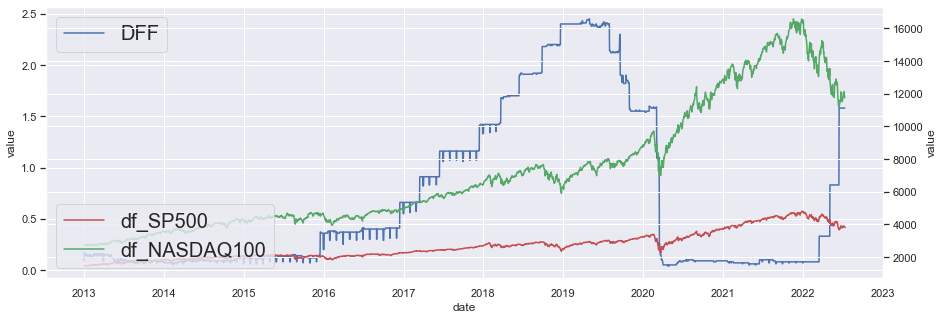

In [38]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.lineplot(data=df_DFF, x="date", y="value", label="DFF")
plt.legend(loc="upper left", fontsize="20")

ax2 = ax1.twinx()
sns.lineplot(data=df_SP500, x="date", y="value", label="df_SP500", color="r")
sns.lineplot(data=df_NASDAQ100, x="date", y="value", label="df_NASDAQ100", color="g")
plt.legend(loc="lower left", fontsize="20")